lr is  0.9
iteration  0
cost = [[2.39830734]] 
iteration  10
cost = [[2.30098561]] 
iteration  20
cost = [[2.29638524]] 
iteration  30
cost = [[2.29255712]] 
iteration  40
cost = [[2.28890765]] 
iteration  50
cost = [[2.28522915]] 
iteration  60
cost = [[2.28149324]] 
iteration  70
cost = [[2.27758464]] 
iteration  80
cost = [[2.27349841]] 
iteration  90
cost = [[2.26900957]] 
iteration  100
cost = [[2.26541859]] 
iteration  110
cost = [[2.26088397]] 
iteration  120
cost = [[2.25662549]] 
iteration  130
cost = [[2.25409598]] 
iteration  140
cost = [[2.24962307]] 
iteration  150
cost = [[2.24151585]] 
iteration  160
cost = [[2.23597558]] 
iteration  170
cost = [[2.22873367]] 
iteration  180
cost = [[2.23140555]] 
iteration  190
cost = [[2.22129115]] 
iteration  200
cost = [[2.24044408]] 
iteration  210
cost = [[2.22133184]] 
iteration  220
cost = [[2.22398179]] 
iteration  230
cost = [[2.20873254]] 
iteration  240
cost = [[2.17458336]] 
iteration  250
cost = [[2.17782976]] 
iteration  2

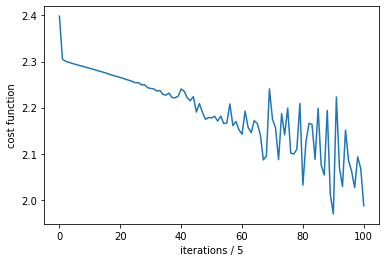

In [2]:
import idx2numpy
import torch
import torch.utils.data
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy

#load dataset
X_train = idx2numpy.convert_from_file(r'C:/Users/Rajashree/Desktop/IvLabs/DigitClassifier/data/train-images.idx3-ubyte')
Y_train = idx2numpy.convert_from_file(r'C:/Users/Rajashree/Desktop/IvLabs/DigitClassifier/data/train-labels.idx1-ubyte')
X_test = idx2numpy.convert_from_file(r'C:/Users/Rajashree/Desktop/IvLabs/DigitClassifier/data/t10k-images.idx3-ubyte')
Y_test = idx2numpy.convert_from_file(r'C:/Users/Rajashree/Desktop/IvLabs/DigitClassifier/data/t10k-labels.idx1-ubyte')

#reshape data
X_train=X_train.reshape(784,60000) #28x28=784, num_examples=60000 
Y_train=Y_train.reshape(1,60000)
X_test=X_test.reshape(784,10000)
Y_test=Y_test.reshape(1,10000)

#normalize data
X_train=X_train/255
X_test=X_test/255

#func to convert label data as a column vector (10,1) of 0s and 1, for every example
def new_hot_y(Y):
    new_y=np.zeros((Y.size,Y.max()+1))
    new_y[np.arange(Y.size),Y]=1
    new_y=new_y.T
    return new_y #new_y.shape = (10,60000)=(num_classes,num_examples)

Y_hot_train=new_hot_y(Y_train)
Y_hot_test=new_hot_y(Y_test)

num_layers=4 # input layer has 784 nodes, layer 1,2,3,4 have 512,256,64,10 nodes 
m =Y_train.shape[1] # num_examples

#initialize_param():
w1=np.random.randn(512,784)*np.sqrt((2/784)) #multiply by sqrt of (2/no of nodes in previous layer)
b1=np.zeros((512,1))
w2=np.random.randn(256,512)*np.sqrt((2/512))   # w[layer].shape = (num_node[layer] , num_node[layer-1])
b2=np.zeros((256,1))                         # b[layer].shape = (num_nodes[layer] , 1)
w3=np.random.randn(64,256)*np.sqrt((2/256)) 
b3=np.zeros((64,1))
w4=np.random.randn(10,64)*np.sqrt((2/64))
b4=np.zeros((10,1))

def relu(x):
    return np.maximum(x,0)

def softmax(x):
    exp_element=np.exp((x))
    return exp_element/np.sum(exp_element,axis=0,keepdims=True)

def der_relu(z):
    return z>0 # gives true or false which is taken as 1 0r 0 , which is the required derivative of relu(1 for z>0 else 0)

def cost():
    global loss,J
    loss = -np.sum( np.multiply(np.log(a4),Y_hot_train) ,axis=0,keepdims=True)
    J=(np.sum(loss,keepdims=True,axis=1))/m
    

lr=0.9
iterations=501
global cost_list
cost_list=[]
print('lr is ',lr)
for i in range(iterations):
    #forward prop
    z1=np.dot(w1,X_train)+b1 # z[layer] = np.dot(w[layer],x[layer-1]) + b[layer]
    a1=relu(z1)              # a[layer] = activation_fn[layer]
    z2=np.dot(w2,a1)+b2
    a2=relu(z2)
    z3=np.dot(w3,a2)+b3
    a3=relu(z3)
    z4=np.dot(w4,a3)+b4
    a4=softmax(z4) #a4.shape = (10,60000)


    if(i%5==0):
        #print('iteration ',i)
        cost()
        
        cost_list.append(J)
        #print(f'cost = {J} ')
    if(i%10==0):
        print('iteration ',i)
        cost()
        print(f'cost = {J} ')
    
    #back prop

    dz4=a4-Y_hot_train                         # dz[num_layer] = a[num_layer] - Y_hot_train
    dw4=(np.dot(dz4,a3.T))/m
    db4=(np.sum(dz4,axis=1,keepdims=True))/m
    da3=np.dot(w4.T,dz4)

    dz3=np.multiply(da3,der_relu(z3))           # dz[layer] = np.multiply(da[layer, der_rulu(z[layer])])
    dw3=(np.dot(dz3,a2.T))/m                    # dw[layer] = (np.dot(dz[layer],a[layer-1].T))/m
    db3=(np.sum(dz3,axis=1,keepdims=True))/m    # db[layer] = (np.sum(dz[layer],axis=1))/m
    da2=np.dot(w3.T,dz3)                        # da[layer-1] = np.dot(w[layer].T,dz[layer])

    dz2=np.multiply(da2,der_relu(z2))
    dw2=(np.dot(dz2,a1.T))/m
    db2=(np.sum(dz2,axis=1,keepdims=True))/m
    da1=np.dot(w2.T,dz2)

    dz1=np.multiply(da1,der_relu(z1))
    dw1=(np.dot(dz1,X_train.T))/m
    db1=(np.sum(dz1,axis=1,keepdims=True))/m
    da0=np.dot(w1.T,dz1)

    #update parameters
    w1=w1-(lr*dw1)
    b1=b1-(lr*db1)
    w2=w2-(lr*dw2)
    b2=b2-(lr*db2)
    w3=w3-(lr*dw3)
    b3=b3-(lr*db3)
    w4=w4-(lr*dw4)
    b4=b4-(lr*db4)

predictions=(np.max(a4,axis=0)==a4)
acc=((np.sum(predictions==Y_hot_train))/Y_hot_train.size)*100
print('accuracy is ',acc)

#print(cost_list)
#print(len(cost_list))
plt.plot(np.arange(len(cost_list)).reshape(len(cost_list),1),np.array(cost_list).reshape(len(cost_list),1))
plt.xlabel("iterations / 5")
plt.ylabel('cost function')
plt.show()
